# Markov Chain Monte Carlo and Importance Sampling methods in UQpy

This notebook illustrates the use of the MCMC and IS classes of the SampleMethods module to sample from a distribution, possibly known up to a constant.

In [1]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt

The following cell defines the 2D distribution to sample from (it is defined via its log pdf function): the Rosenbrock function.

In [2]:
def log_pdf_target(x, param):
    return -(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/param
args_target = (20, )

### MCMC: Metropolis Hastings algorithm

The proposal density is a bi-variate normal distribution with standard deviation 0.5 and 2. in directions 1 and 2 respectively.

In [3]:
from UQpy.Distributions import Distribution
proposal = Distribution(['normal', 'normal'], params=[[0., 0.5], [0., 2.]])

In [4]:
from UQpy.SampleMethods import MCMC
sampler = MCMC(dimension=2, algorithm='MH', nburn=500, jump=100, seed=None, 
         log_pdf_target=log_pdf_target, args_target=args_target,
         proposal=proposal, proposal_is_symmetric=True)
sampler.run(nsamples=500)

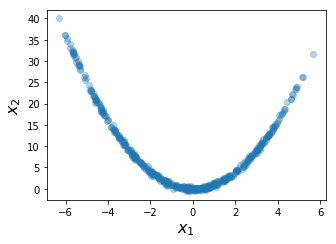

In [5]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(sampler.samples[:,0], sampler.samples[:,1], 'o', alpha=0.3)
ax.set_xlabel('$x_{1}$', fontsize=16)
ax.set_ylabel('$x_{2}$', fontsize=16)
plt.show()

### Importance Sampling

The importance (proposal) distribution is a bivariate distribution with independent uniform and gamma marginals.

In [6]:
proposal = Distribution(['uniform', 'gamma'], params=[[-4., 10.], [1.5, -1, 8]])

In [8]:
from UQpy.SampleMethods import IS
sampler = IS(log_pdf_target=log_pdf_target, args_target=args_target, proposal=proposal)
sampler.run(nsamples=4000)

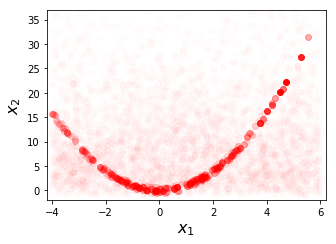

In [9]:
fig, ax = plt.subplots(figsize=(5, 3.5))
minw, maxw = min(sampler.weights), max(sampler.weights)
slope = 0.98 / (maxw-minw)
for s, w in zip(sampler.samples, sampler.weights):
    ax.scatter(s[0], s[1], marker='o', alpha=0.01+slope*(w-minw), color='red')
ax.set_xlabel('$x_{1}$', fontsize=16)
ax.set_ylabel('$x_{2}$', fontsize=16)
ax.set_xlim([-4.2, 6.2])
ax.set_ylim([-2, 37])
plt.show()